In [1]:
# Print all the interactive output without resorting to print, not only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Coverance experiments

In [2]:
# Array with  X1, X2, X3, X4 features.
X = np.array([ [0.1, 0.3, 0.4, 0.8],
               [3.2, 2.4, 2.4, 0.1],
               [10., 8.2, 4.3, 2.6],
             ])

pd.DataFrame(X,columns=['X1','X2', 'X3', 'X4'])

#np.cov(X.T)
# Covarience matrix
pd.DataFrame(np.cov(X.T), columns=['X1','X2', 'X3', 'X4'], index=['X1','X2', 'X3', 'X4'])

# Covarience matrix between X1 and X2
pd.DataFrame(np.cov(X.T[0], X.T[1]),columns=['X1','X2'], index=['X1','X2'])


,X1,X2,X3,X4
0,0.1,0.3,0.4,0.8
1,3.2,2.4,2.4,0.1
2,10.0,8.2,4.3,2.6


,X1,X2,X3,X4
X1,25.643333,20.693333,9.621667,5.441667
X2,20.693333,16.743333,7.671667,4.541667
X3,9.621667,7.671667,3.803333,1.728333
X4,5.441667,4.541667,1.728333,1.663333


,X1,X2
X1,25.643333,20.693333
X2,20.693333,16.743333


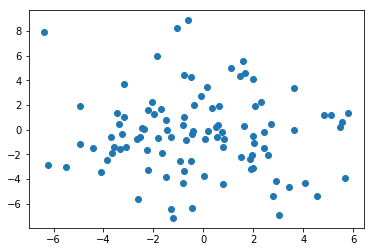

In [3]:
mean = [0,0]

#  covariance Matrix
cov = [[8, 0],
       [0, 9]]


dataset = np.random.multivariate_normal(mean, cov, 100)


t = plt.scatter(dataset.T[0], dataset.T[1])


,X1,X2
X1,247.860000,511.337222
X2,511.337222,1068.689107


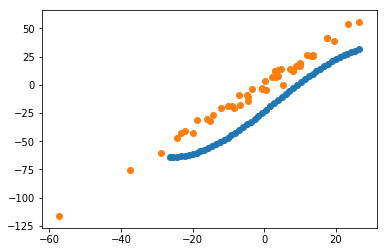

In [4]:
# Cook up some data

mean = [0,0]

a = np.arange(50)
a = a * 0.08 + a
a = a - np.max(a)/2
b = a * 2.5 + (a**2) * 0.01 - (a**3) * 0.001 + 8
b = b - np.max(b)/2

t = plt.scatter(a, b)

pd.DataFrame(np.cov(a, b),columns=['X1','X2'], index=['X1','X2'])

# feed the covariance matrix into random number generator 


cov = np.cov(a, b)
dataset = np.random.multivariate_normal([0, 0], cov, 50) 
t = plt.scatter(dataset.T[0], dataset.T[1])

#sns.kdeplot(dframe)

In [27]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_y():
    '''
    highlight yellow.
    '''
    return ['background-color: yellow']


# Make 'rs' and then use 'rs'. instead of np.random.
# pass 'rs' around, and have multiple random streams

rs = np.random.RandomState(0)

df = pd.DataFrame(rs.randn(10, 10), columns=list('ABCDEFGHIJ'))

corr = df.corr()

corr.style.applymap(color_negative_red).apply(highlight_max)

#corr.style

corr.style.background_gradient().set_precision(2)

corr.style.format({'B': "{:+.2f}", 'D': '{:+.2f}'})

df.style.format({"A": lambda x: "±{:.2f}".format(abs(x))})


,A,B,C,D,E,F,G,H,I,J
A,1,0.0825498,0.261307,0.304251,-0.121781,-0.0743827,0.238587,-0.0872331,-0.160386,-0.456985
B,0.0825498,1,0.682274,-0.170654,0.420542,0.392497,0.731951,-0.0807083,0.614897,0.140544
C,0.261307,0.682274,1,0.02354,0.741546,-0.116195,0.411299,-0.605807,0.654756,0.389528
D,0.304251,-0.170654,0.02354,1,0.109978,-0.266241,-0.0139375,0.144274,-0.016044,-0.053498
E,-0.121781,0.420542,0.741546,0.109978,1,-0.224427,0.334289,-0.535682,0.602675,0.790161
F,-0.0743827,0.392497,-0.116195,-0.266241,-0.224427,1,0.402295,0.24938,-0.420028,-0.106118
G,0.238587,0.731951,0.411299,-0.0139375,0.334289,0.402295,1,-0.104955,0.327072,-0.00642408
H,-0.0872331,-0.0807083,-0.605807,0.144274,-0.535682,0.24938,-0.104955,1,-0.186537,-0.180118
I,-0.160386,0.614897,0.654756,-0.016044,0.602675,-0.420028,0.327072,-0.186537,1,0.372869
J,-0.456985,0.140544,0.389528,-0.053498,0.790161,-0.106118,-0.00642408,-0.180118,0.372869,1


,A,B,C,D,E,F,G,H,I,J
A,1,0.083,0.26,0.3,-0.12,-0.074,0.24,-0.087,-0.16,-0.46
B,0.083,1,0.68,-0.17,0.42,0.39,0.73,-0.081,0.61,0.14
C,0.26,0.68,1,0.024,0.74,-0.12,0.41,-0.61,0.65,0.39
D,0.3,-0.17,0.024,1,0.11,-0.27,-0.014,0.14,-0.016,-0.053
E,-0.12,0.42,0.74,0.11,1,-0.22,0.33,-0.54,0.6,0.79
F,-0.074,0.39,-0.12,-0.27,-0.22,1,0.4,0.25,-0.42,-0.11
G,0.24,0.73,0.41,-0.014,0.33,0.4,1,-0.1,0.33,-0.0064
H,-0.087,-0.081,-0.61,0.14,-0.54,0.25,-0.1,1,-0.19,-0.18
I,-0.16,0.61,0.65,-0.016,0.6,-0.42,0.33,-0.19,1,0.37
J,-0.46,0.14,0.39,-0.053,0.79,-0.11,-0.0064,-0.18,0.37,1


,A,B,C,D,E,F,G,H,I,J
A,1,+0.08,0.261307,+0.30,-0.121781,-0.0743827,0.238587,-0.0872331,-0.160386,-0.456985
B,0.0825498,+1.00,0.682274,-0.17,0.420542,0.392497,0.731951,-0.0807083,0.614897,0.140544
C,0.261307,+0.68,1,+0.02,0.741546,-0.116195,0.411299,-0.605807,0.654756,0.389528
D,0.304251,-0.17,0.02354,+1.00,0.109978,-0.266241,-0.0139375,0.144274,-0.016044,-0.053498
E,-0.121781,+0.42,0.741546,+0.11,1,-0.224427,0.334289,-0.535682,0.602675,0.790161
F,-0.0743827,+0.39,-0.116195,-0.27,-0.224427,1,0.402295,0.24938,-0.420028,-0.106118
G,0.238587,+0.73,0.411299,-0.01,0.334289,0.402295,1,-0.104955,0.327072,-0.00642408
H,-0.0872331,-0.08,-0.605807,+0.14,-0.535682,0.24938,-0.104955,1,-0.186537,-0.180118
I,-0.160386,+0.61,0.654756,-0.02,0.602675,-0.420028,0.327072,-0.186537,1,0.372869
J,-0.456985,+0.14,0.389528,-0.05,0.790161,-0.106118,-0.00642408,-0.180118,0.372869,1


,A,B,C,D,E,F,G,H,I,J
0,±1.76,0.400157,0.978738,2.24089,1.86756,-0.977278,0.950088,-0.151357,-0.103219,0.410599
1,±0.14,1.45427,0.761038,0.121675,0.443863,0.333674,1.49408,-0.205158,0.313068,-0.854096
2,±2.55,0.653619,0.864436,-0.742165,2.26975,-1.45437,0.0457585,-0.187184,1.53278,1.46936
3,±0.15,0.378163,-0.887786,-1.9808,-0.347912,0.156349,1.23029,1.20238,-0.387327,-0.302303
4,±1.05,-1.42002,-1.70627,1.95078,-0.509652,-0.438074,-1.2528,0.77749,-1.6139,-0.21274
5,±0.90,0.386902,-0.510805,-1.18063,-0.0281822,0.428332,0.0665172,0.302472,-0.634322,-0.362741
6,±0.67,-0.359553,-0.813146,-1.72628,0.177426,-0.401781,-1.6302,0.462782,-0.907298,0.0519454
7,±0.73,0.128983,1.1394,-1.23483,0.402342,-0.68481,-0.870797,-0.57885,-0.311553,0.0561653
8,±1.17,0.900826,0.465662,-1.53624,1.48825,1.89589,1.17878,-0.179925,-1.07075,1.05445
9,±0.40,1.22245,0.208275,0.976639,0.356366,0.706573,0.0105,1.78587,0.126912,0.401989
